# GEO Objects
Create statistics for GEO objects.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

from matplotlib.patches import Ellipse

import numpy as np

from satdb import DBConfig, Dbase, tools

## Define some constants.

A template for the configuration file `satdb.yaml` can be found [here](https://raw.githubusercontent.com/rzbrk/satdb/master/satdb_example.yaml).

In [58]:
## Config file
config_file = "../satdb.yaml"

## Earth radius [km]
mrad = 6378.137

## Specify altitude and inclination range
geo_sma = 42164.
sma_range = [geo_sma - 1500., geo_sma + 1500.]
incl_range = [-30., 30.]

## Define the matplotlib figure size
plt.rcParams["figure.figsize"] = (9,9)

In [59]:
config = DBConfig(config_file)
dbc = Dbase(config)
dbc.connect()

In [61]:
sql = """
select o.norad, m.name, o.semimajor_axis, o.eccentricity, o.inclination, m.obj_type from orbelem as o
inner join metadata as m on o.norad=m.norad
where (o.norad, o.epoch) in
(select norad,max(epoch) from orbelem group by norad)
and o.semimajor_axis between %s and %s and o.inclination between %s and %s
"""
res = dbc.fetchall(sql, (sma_range[0], sma_range[1], incl_range[0], incl_range[1],))
print("# objects:", len(res))

# objects: 1578


In [66]:
# PAYLOAD
pl_sma = []
pl_ecc = []
pl_incl = []
# ROCKET BODY
rb_sma = []
rb_ecc = []
rb_incl = []
# DEBRIS
sd_sma = []
sd_ecc = []
sd_incl = []
# TBA, None, ...
un_sma = []
un_ecc = []
un_incl = []

for r in res:
    if r[5] == "PAYLOAD":
        pl_sma.append(r[2])
        pl_ecc.append(r[3])
        pl_incl.append(r[4])
    elif r[5] == "ROCKET BODY":
        rb_sma.append(r[2])
        rb_ecc.append(r[3])
        rb_incl.append(r[4])
    elif r[5] == "DEBRIS":
        sd_sma.append(r[2])
        sd_ecc.append(r[3])
        sd_incl.append(r[4])
    else:
        un_sma.append(r[2])
        un_ecc.append(r[3])
        un_incl.append(r[4])
              
all_sma = pl_sma + rb_sma + sd_sma + un_sma
all_ecc = pl_ecc + rb_ecc + sd_ecc + un_ecc
all_incl = pl_incl + rb_incl + sd_incl + un_incl


## Inclination over Altitude

<IPython.core.display.Javascript object>


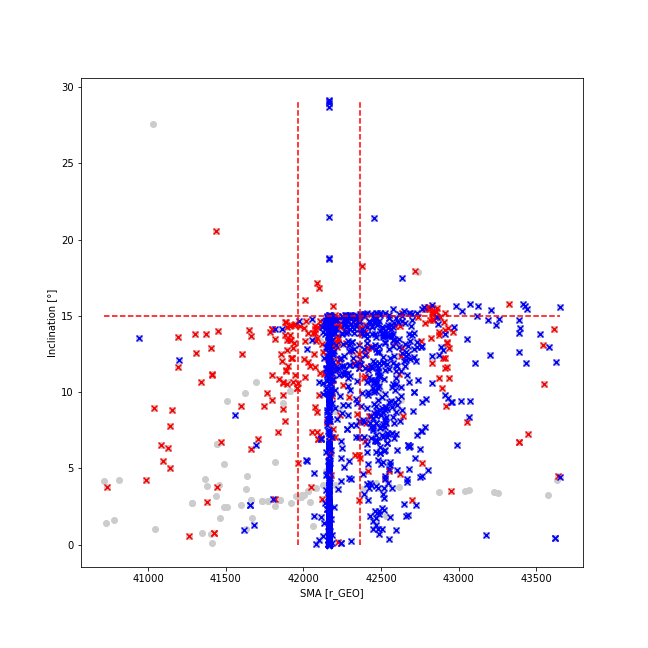

Text(0, 0.5, 'Inclination [°]')

In [75]:
fig_incl_sma = plt.figure()
ax = fig_incl_sma.add_subplot()
ax.scatter(all_sma, all_incl, marker='o', color='0.8')
ax.scatter(rb_sma, rb_incl, marker='x', color='r')
ax.scatter(pl_sma, pl_incl, marker='x', color='b')

ax.plot(
    [geo_sma - 200., geo_sma - 200.],
    [min(all_incl), max(all_incl)],
    linestyle="--", color="Red"
)
ax.plot(
    [geo_sma + 200., geo_sma + 200.],
    [min(all_incl), max(all_incl)],
    linestyle="--", color="Red"
)
ax.plot(
    [min(all_sma), max(all_sma)],
    [15., 15.],
    linestyle="--", color="Red"
)

ax.set_xlabel('SMA [r_GEO]')
ax.set_ylabel('Inclination [°]')
